### By: Mowafak Allaham

<p>If you are not a big fan of Shakespeare's literature, but interested in learning some fun facts about it, you are in the right spot! <br>

Thanks to LiamLarsen for uploading this interesting dataset on Kaggle. In this analysis, I'm interested to answer some of the following questions:</p>

    - Which of all Sheakespeare plays has the largest number of actors?
    - Which of all Sheaksepeare plays has the largest number of lines?
    - Which actor(s) spoke the most number lines in each play?
    - Which actor(s) were common across all of Shakespeare plays?
    - Which actor(s) were the most influential across all the plays?
You can also find my analysis on Kaggle in [here](https://www.kaggle.com/mallaham/d/kingburrito666/shakespeare-plays/network-analysis-of-shakespeare-plays)

In [111]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Shakespeare_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Data-line             111396 non-null int64
Play                  111396 non-null object
Player Line number    111393 non-null float64
Act-Scene-Line        105153 non-null object
Player                111389 non-null object
Player-Line           111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [7]:
data['Player'].replace(np.nan, 'Other',inplace = True)
data.head(5)

Data-line      Play  Player Line number Act-Scene-Line         Player  \
0          1  Henry IV                 NaN            NaN          Other   
1          2  Henry IV                 NaN            NaN          Other   
2          3  Henry IV                 NaN            NaN          Other   
3          4  Henry IV                 1.0          1.1.1  KING HENRY IV   
4          5  Henry IV                 1.0          1.1.2  KING HENRY IV   

                                         Player-Line  
0                                              ACT I  
1                       SCENE I. London. The palace.  
2  Enter KING HENRY, LORD JOHN OF LANCASTER, the ...  
3             So shaken as we are, so wan with care,  
4         Find we a time for frighted peace to pant,

### Listing all the plays

In [70]:
print("Number of plays are: " + str(data['Play'].nunique()))

Number of plays are: 36


In [71]:
pd.DataFrame(data['Play'].unique().tolist(), columns=['Play Name'])

Play Name
0                   Henry IV
1            Henry VI Part 1
2            Henry VI Part 2
3            Henry VI Part 3
4   Alls well that ends well
5             As you like it
6       Antony and Cleopatra
7         A Comedy of Errors
8                 Coriolanus
9                  Cymbeline
10                    Hamlet
11                   Henry V
12                Henry VIII
13                 King John
14             Julius Caesar
15                 King Lear
16        Loves Labours Lost
17                   macbeth
18       Measure for measure
19        Merchant of Venice
20    Merry Wives of Windsor
21  A Midsummer nights dream
22    Much Ado about nothing
23                   Othello
24                  Pericles
25                Richard II
26               Richard III
27          Romeo and Juliet
28       Taming of the Shrew
29               The Tempest
30           Timon of Athens
31          Titus Andronicus
32      Troilus and Cressida
33             Twelfth Night
34   Two Gentlemen of Verona
35            A Winters Tale

### Number of players per play

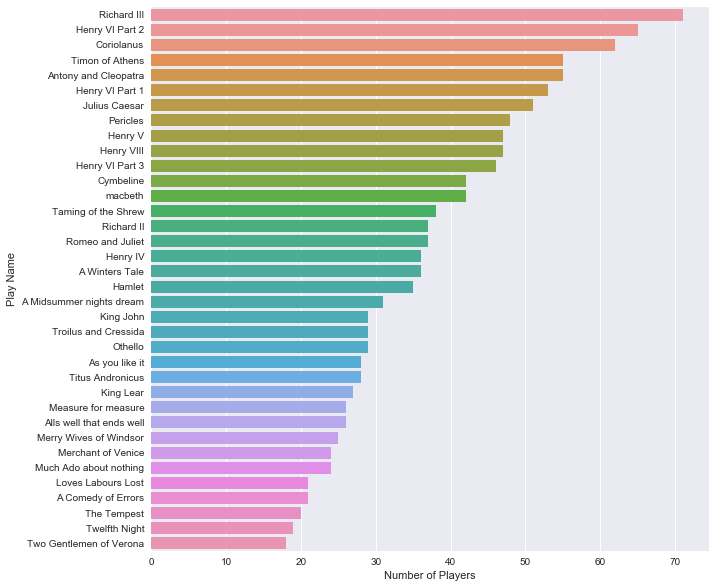

In [353]:
numberPlayers = data.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
numberPlayers

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()


### Number of lines in each play

In [80]:
data.groupby('Play').count().sort_values(by='Player-Line',ascending=False)['Player-Line']

Play
Hamlet                      4244
Coriolanus                  3992
Cymbeline                   3958
Richard III                 3941
Antony and Cleopatra        3862
King Lear                   3766
Othello                     3762
Troilus and Cressida        3711
A Winters Tale              3489
Henry VIII                  3419
Henry V                     3395
Henry VI Part 2             3334
Romeo and Juliet            3313
Henry IV                    3205
Henry VI Part 3             3138
Alls well that ends well    3083
Measure for measure         2998
Loves Labours Lost          2986
Henry VI Part 1             2983
Richard II                  2937
Merry Wives of Windsor      2831
As you like it              2822
Taming of the Shrew         2806
Merchant of Venice          2802
Julius Caesar               2771
King John                   2766
Titus Andronicus            2726
Much Ado about nothing      2704
Timon of Athens             2662
Twelfth Night               2648
Peric

In [108]:
#converting the results above to a dataframe.
play_data = data.groupby('Play').count().sort_values(by='Player-Line',ascending=False)['Player-Line']
play_data = play_data.to_frame()
play_data['Play'] = play_data.index.tolist()
play_data.index = np.arange(0,len(play_data)) #changing the index from plays to numbers
play_data.columns =['Lines','Play']
play_data

Lines                      Play
0    4244                    Hamlet
1    3992                Coriolanus
2    3958                 Cymbeline
3    3941               Richard III
4    3862      Antony and Cleopatra
5    3766                 King Lear
6    3762                   Othello
7    3711      Troilus and Cressida
8    3489            A Winters Tale
9    3419                Henry VIII
10   3395                   Henry V
11   3334           Henry VI Part 2
12   3313          Romeo and Juliet
13   3205                  Henry IV
14   3138           Henry VI Part 3
15   3083  Alls well that ends well
16   2998       Measure for measure
17   2986        Loves Labours Lost
18   2983           Henry VI Part 1
19   2937                Richard II
20   2831    Merry Wives of Windsor
21   2822            As you like it
22   2806       Taming of the Shrew
23   2802        Merchant of Venice
24   2771             Julius Caesar
25   2766                 King John
26   2726          Titus Andronicus
27   2704    Much Ado about nothing
28   2662           Timon of Athens
29   2648             Twelfth Night
30   2641                  Pericles
31   2586                   macbeth
32   2403               The Tempest
33   2357   Two Gentlemen of Verona
34   2300  A Midsummer nights dream
35   2055        A Comedy of Errors

#### Plotting results

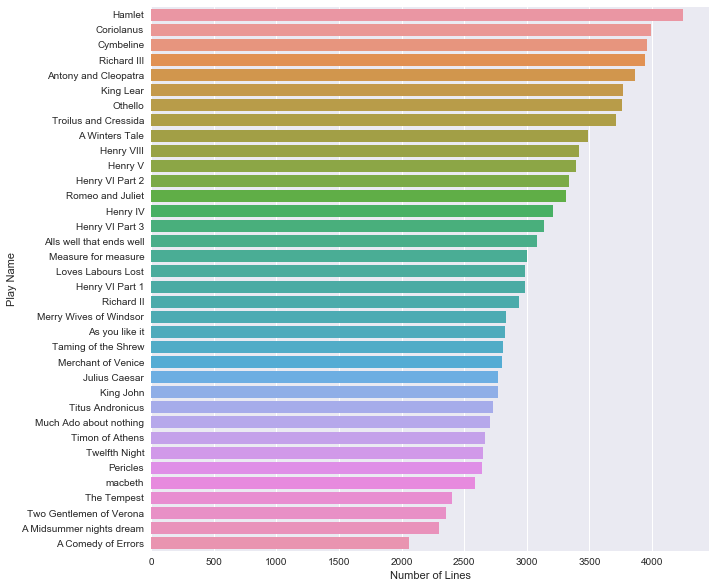

In [113]:
plt.figure(figsize=(10,10))
ax= sns.barplot(x='Lines',y='Play',data=play_data, order = play_data['Play'])
ax.set(xlabel='Number of Lines', ylabel='Play Name')
plt.show()

### Number of lines spoken per player in each play

In [59]:
data.groupby(['Play','Player']).count()['Player-Line']

Play                      Player            
A Comedy of Errors        ADRIANA               284
                          AEGEON                150
                          AEMELIA                75
                          ANGELO                 99
                          ANTIPHOLUS              6
                          BALTHAZAR              31
                          Courtezan              43
                          DROMIO OF EPHESUS     191
                          DROMIO OF SYRACUSE    323
                          DUKE SOLINUS           97
                          First Merchant         19
                          Gaoler                  1
                          LUCE                   11
                          LUCIANA               118
                          OCTAVIUS CAESAR         3
                          OF EPHESUS            221
                          OF SYRACUSE           292
                          Officer                17
                   

In [190]:
lines_per_player= data.groupby(['Play','Player']).count()['Player-Line']
lines_per_player= lines_per_player.to_frame()
lines_per_player

Player-Line
Play                     Player                         
A Comedy of Errors       ADRIANA                     284
                         AEGEON                      150
                         AEMELIA                      75
                         ANGELO                       99
                         ANTIPHOLUS                    6
                         BALTHAZAR                    31
                         Courtezan                    43
                         DROMIO OF EPHESUS           191
                         DROMIO OF SYRACUSE          323
                         DUKE SOLINUS                 97
                         First Merchant               19
                         Gaoler                        1
                         LUCE                         11
                         LUCIANA                     118
                         OCTAVIUS CAESAR               3
                         OF EPHESUS                  221
                         OF SYRACUSE                 292
                         Officer                      17
                         PINCH                        17
                         Second Merchant              41
                         Servant                      16
A Midsummer nights dream ALL                           2
                         BOTTOM                      220
                         COBWEB                        4
                         DEMETRIUS                   144
                         EGEUS                        42
                         FLUTE                        26
                         FORD                          3
                         Fairy                        33
                         HELENA                      237
...                                                  ...
macbeth                  First Murderer               35
                         First Witch                  68
                         Gentlewoman                  27
                         HECATE                       43
                         LADY MACBETH                279
                         LADY MACDUFF                 43
                         LENNOX                       79
                         Lord                         25
                         Lords                         4
                         MACBETH                     783
                         MACDUFF                     193
                         MALCOLM                     222
                         MENTEITH                     12
                         Messenger                    24
                         Old Man                      15
                         Porter                       53
                         ROSS                        137
                         SEYTON                        6
                         SIWARD                       37
                         Second Apparition             5
                         Second Murderer              16
                         Second Witch                 29
                         Sergeant                     35
                         Servant                       6
                         Soldiers                      1
                         Son                          24
                         Third Apparition              6
                         Third Murderer                8
                         Third Witch                  27
                         YOUNG SIWARD                  8

[1328 rows x 1 columns]

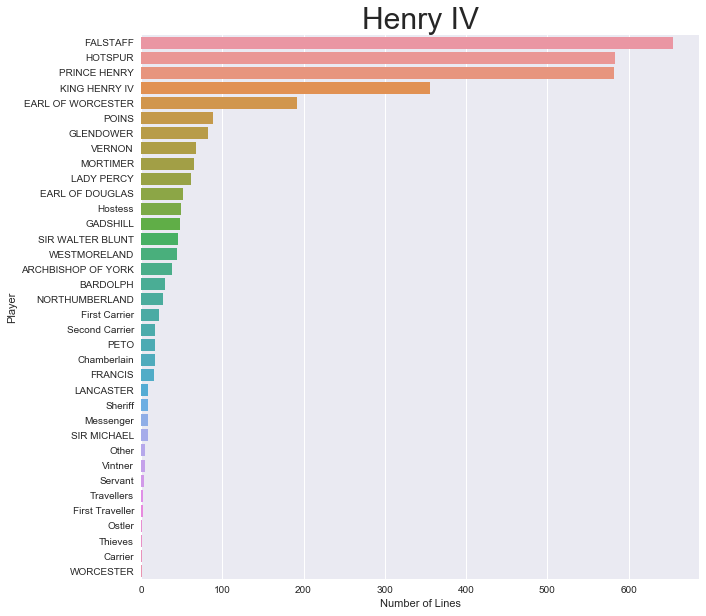

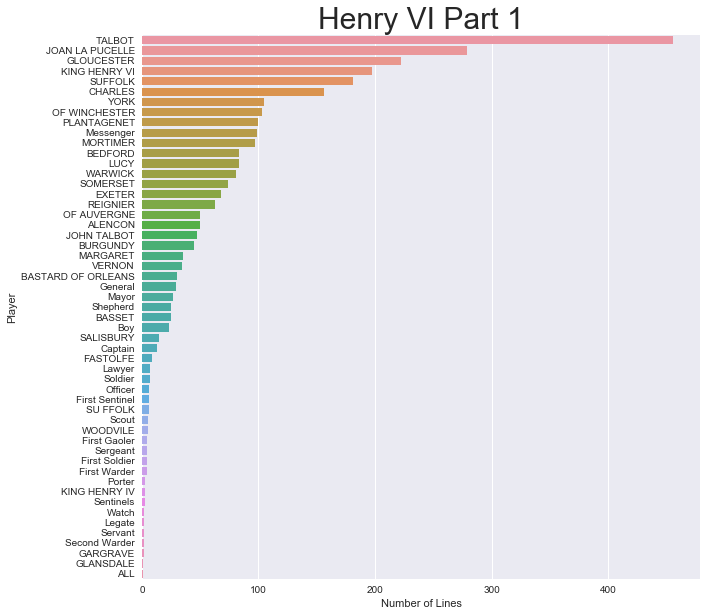

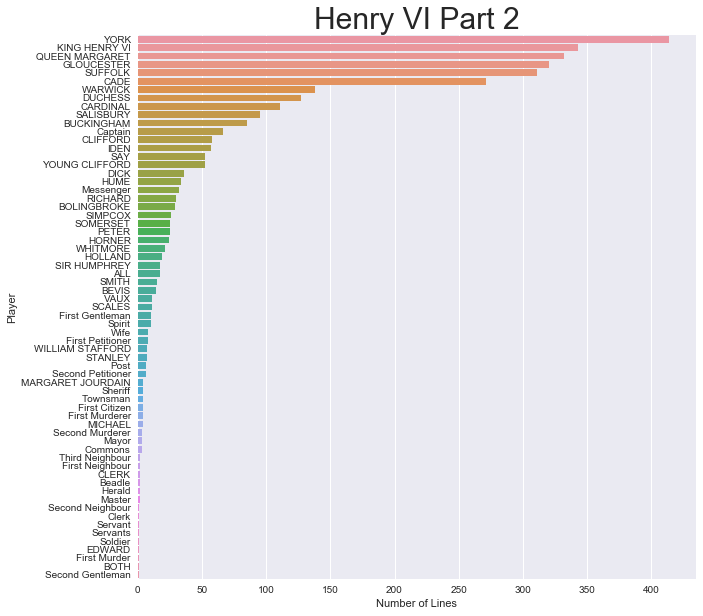

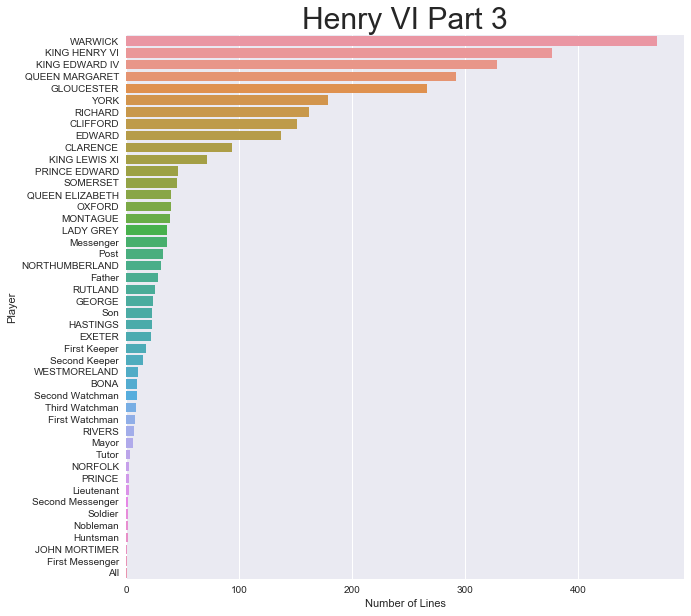

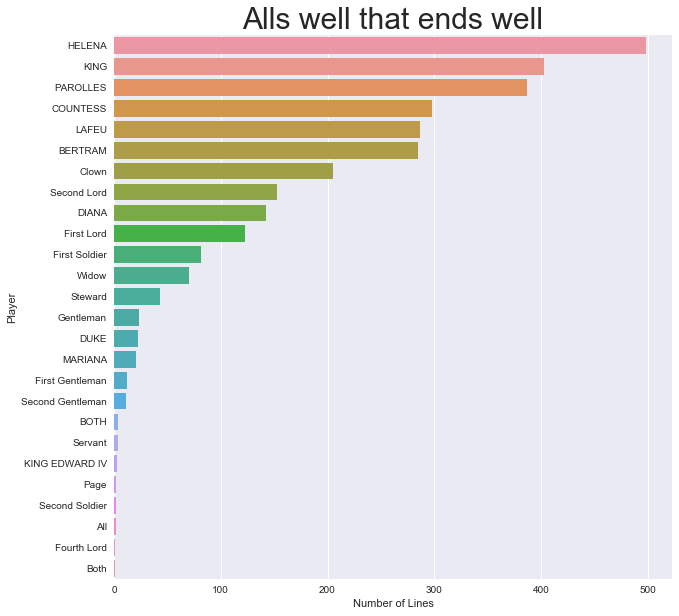

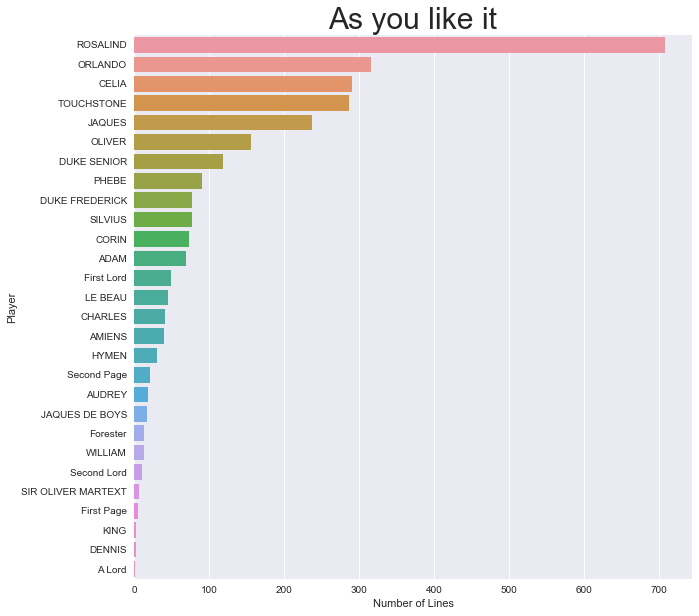

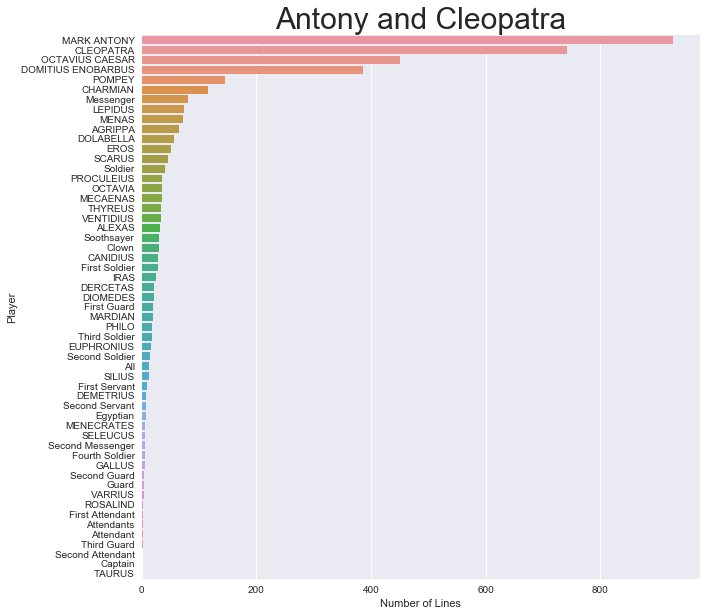

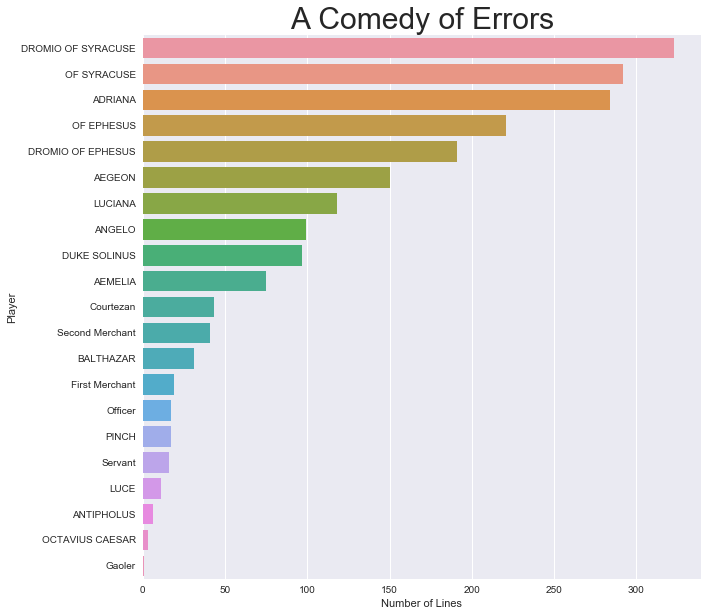

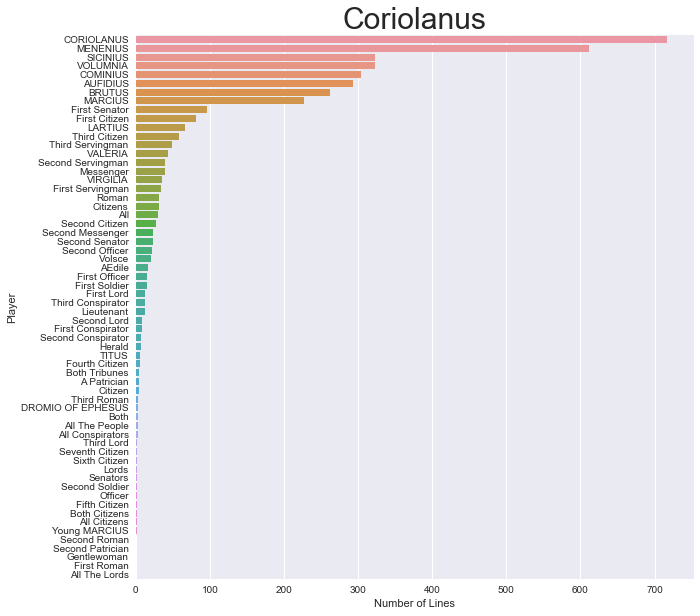

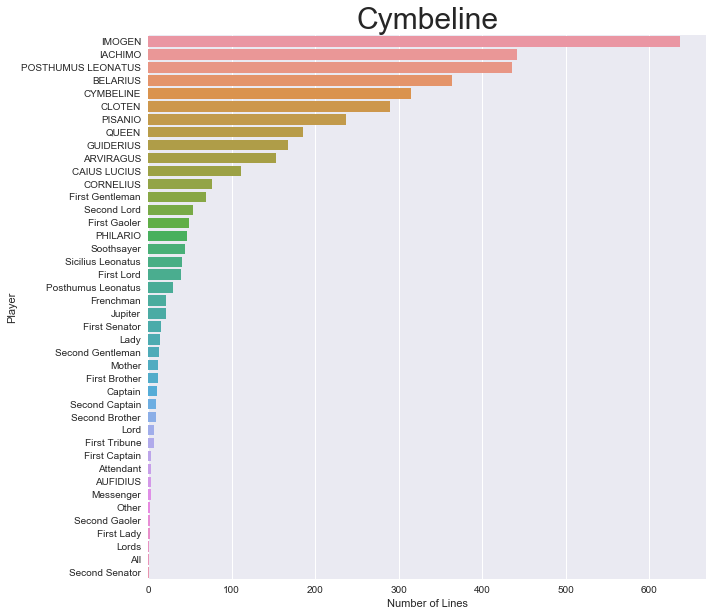

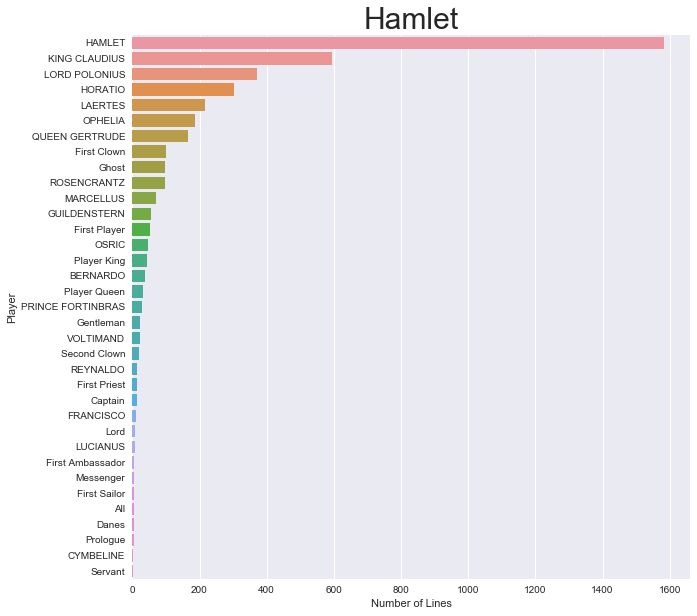

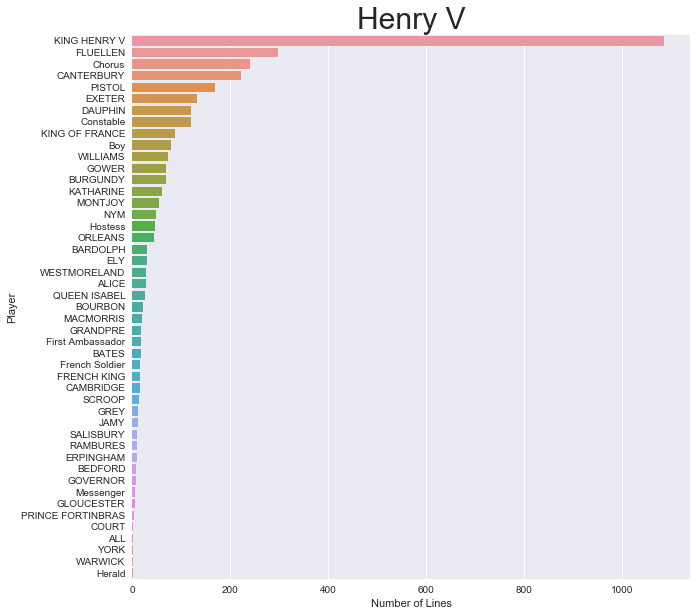

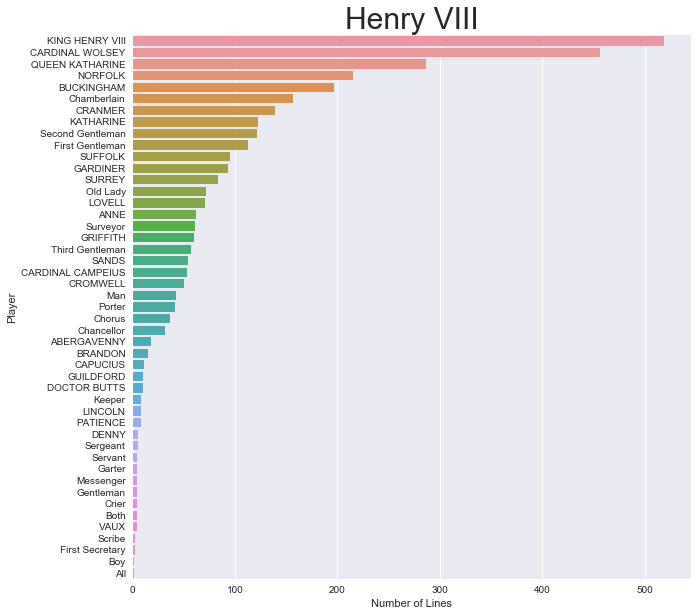

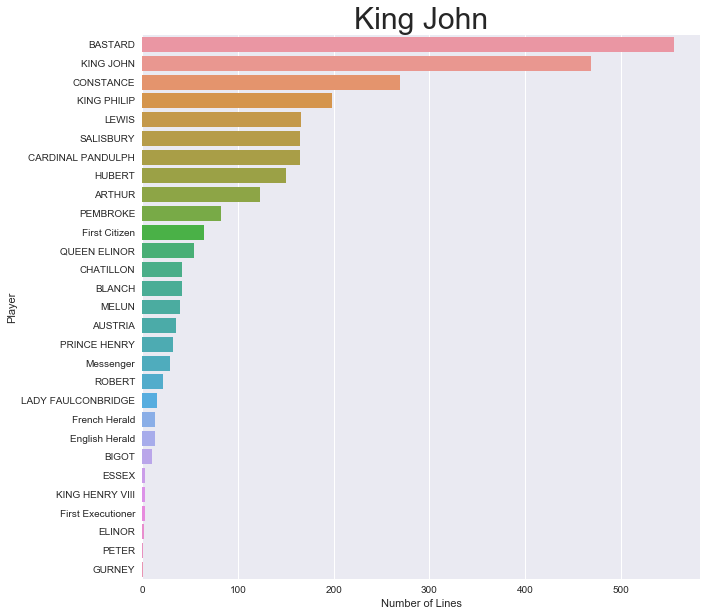

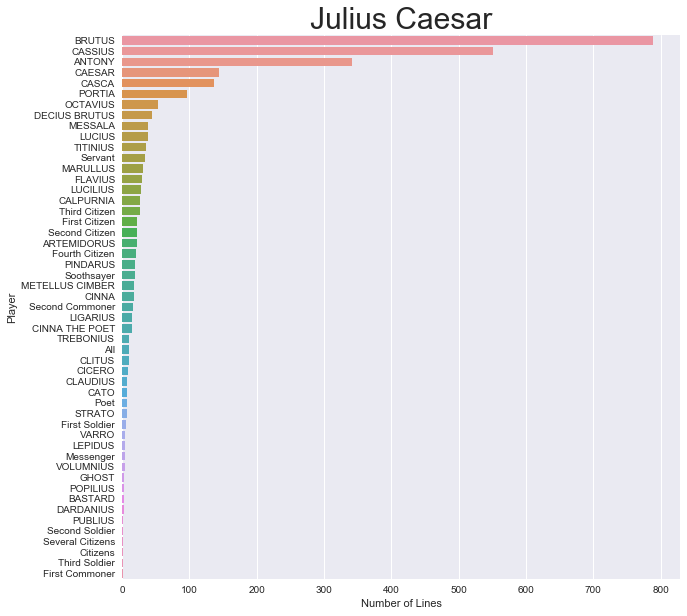

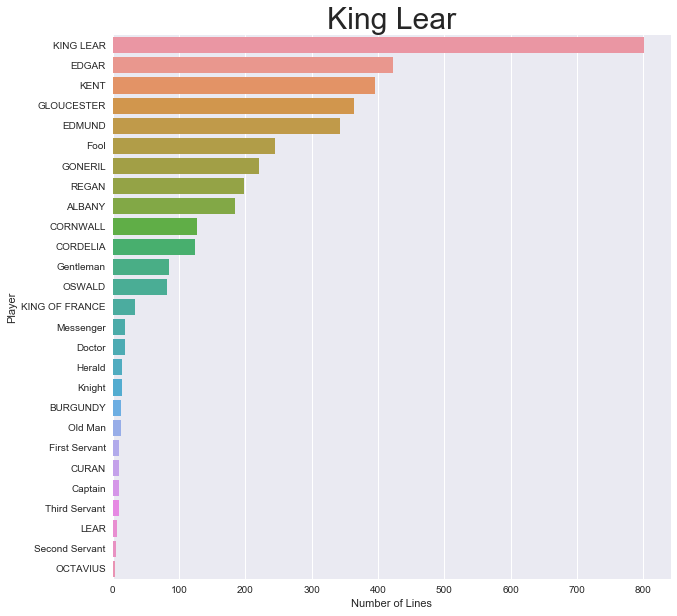

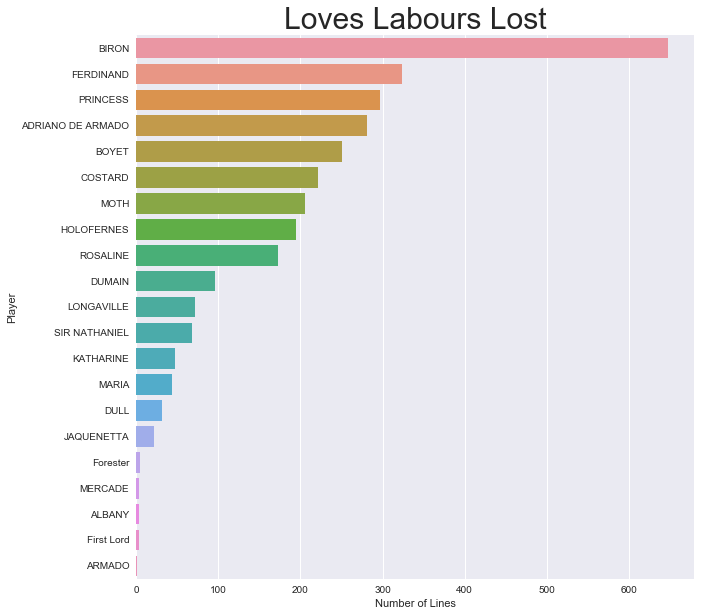

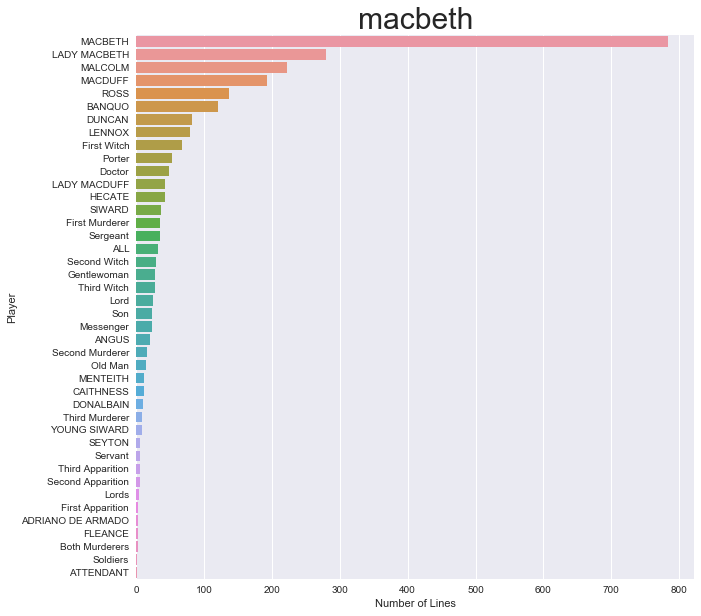

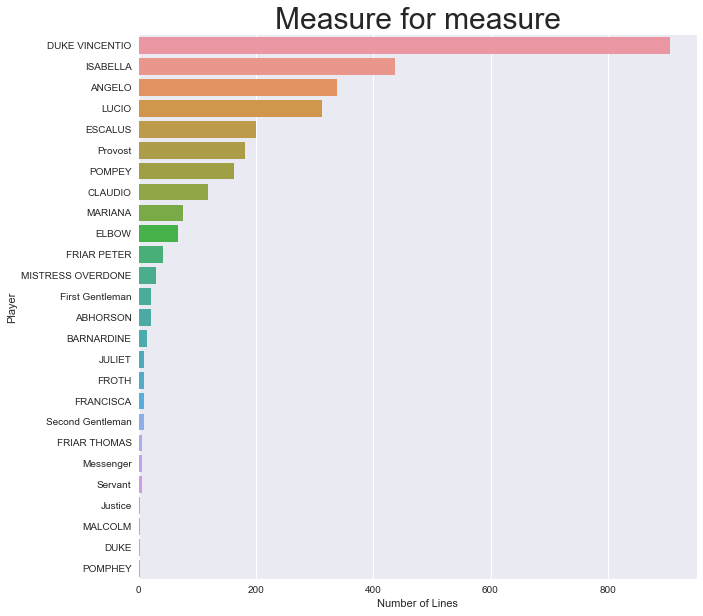

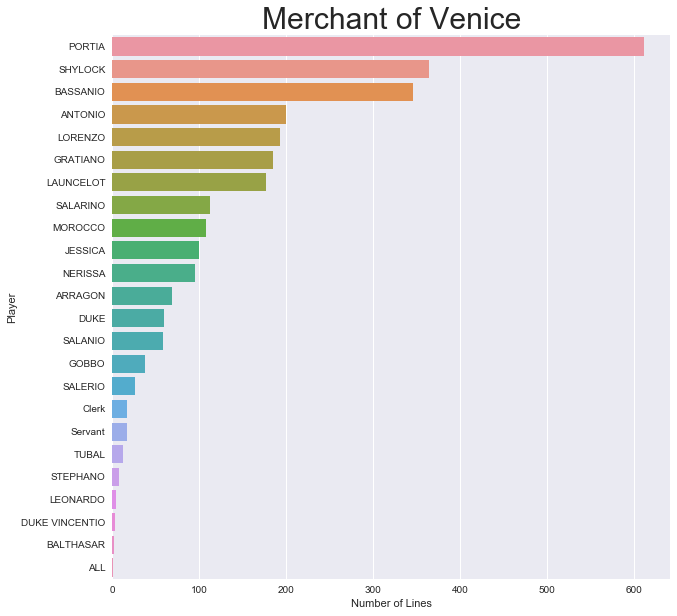

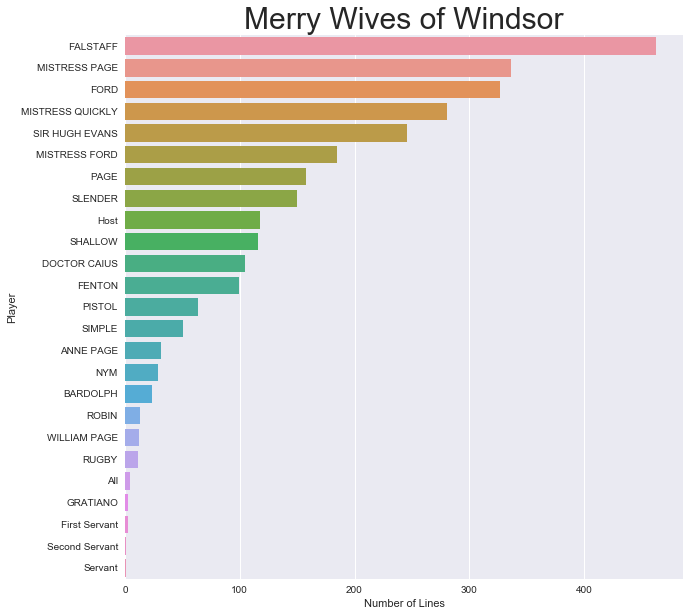

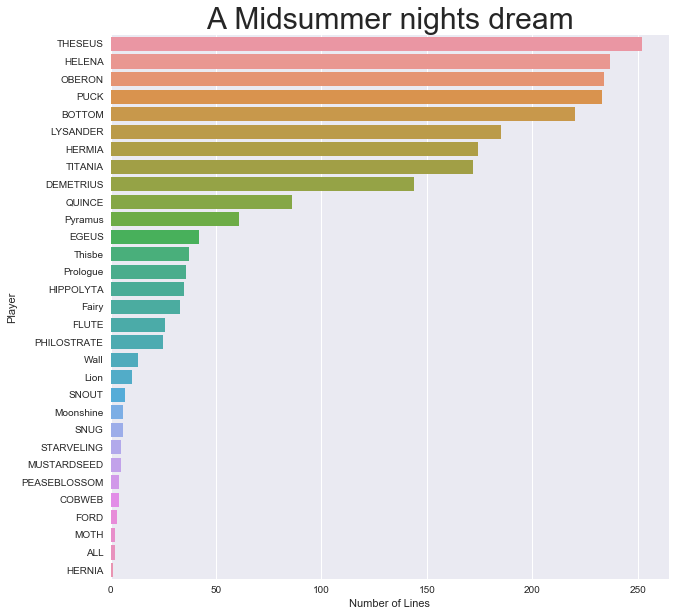

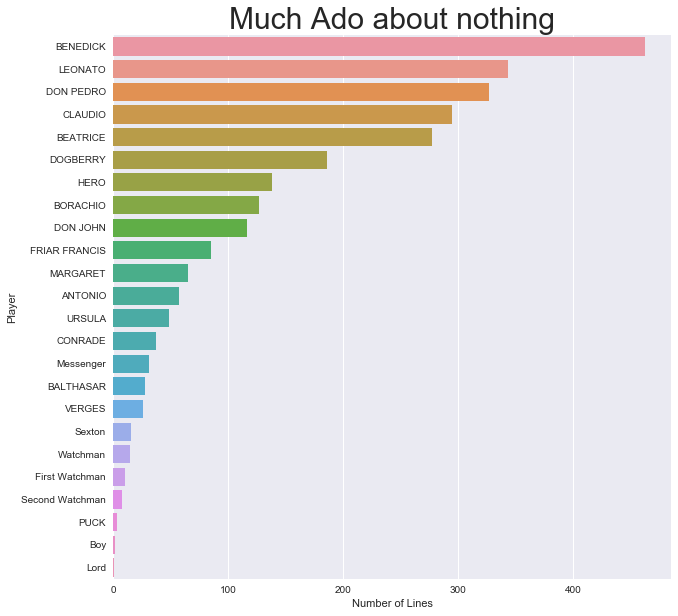

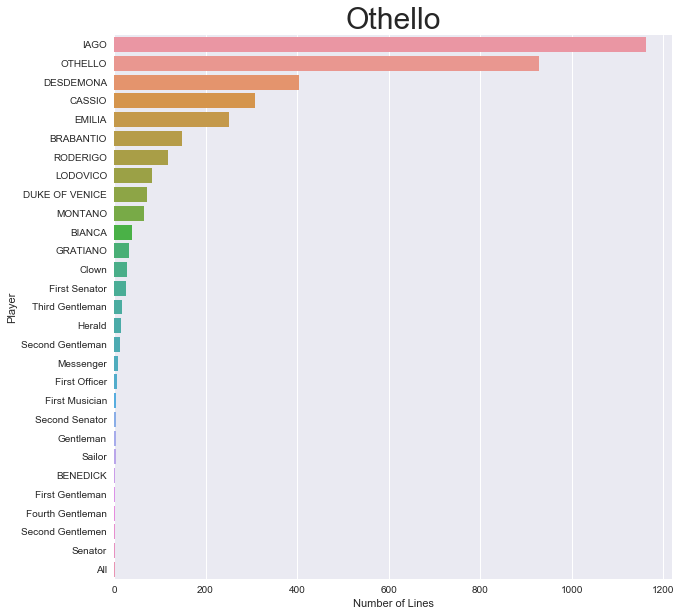

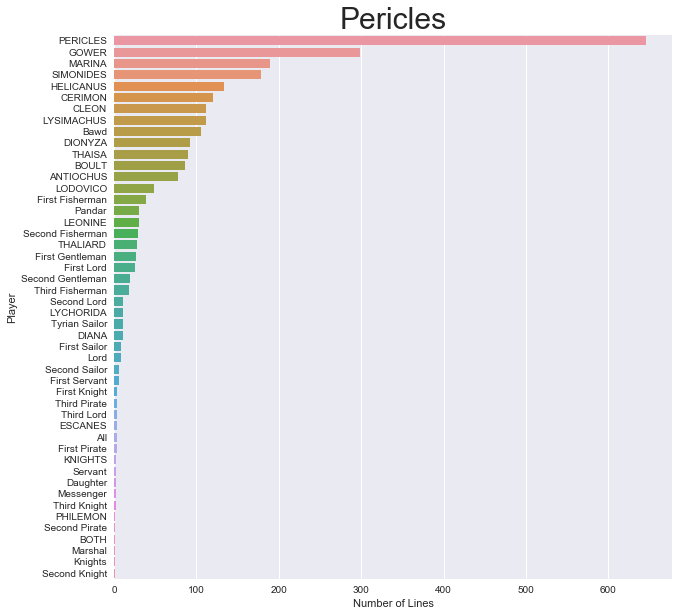

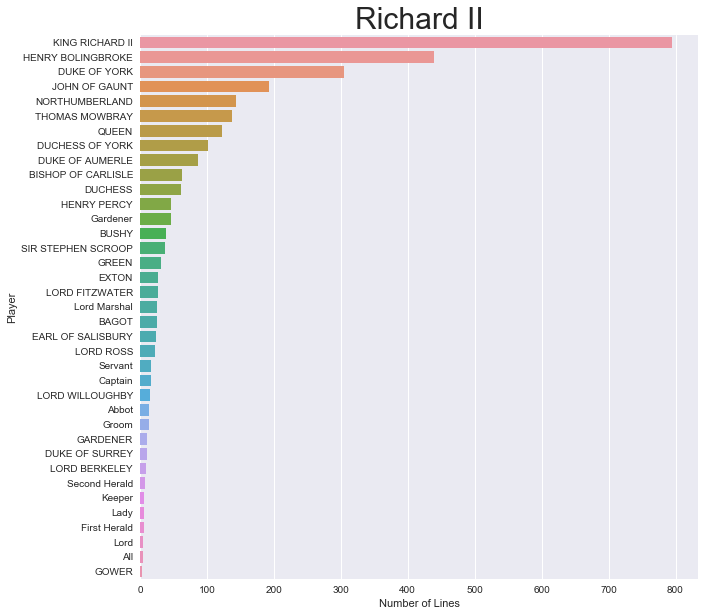

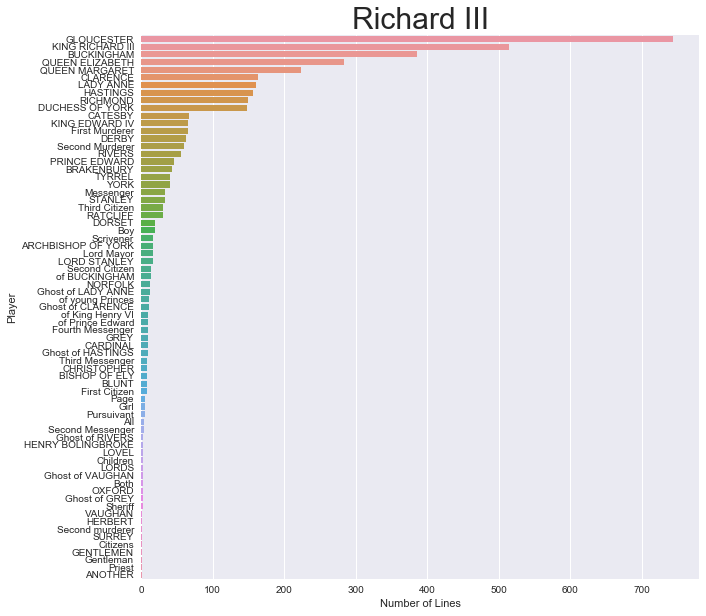

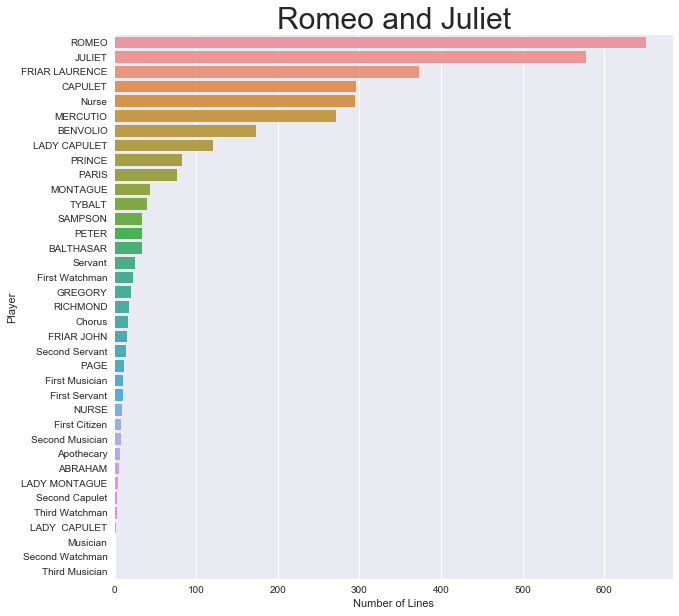

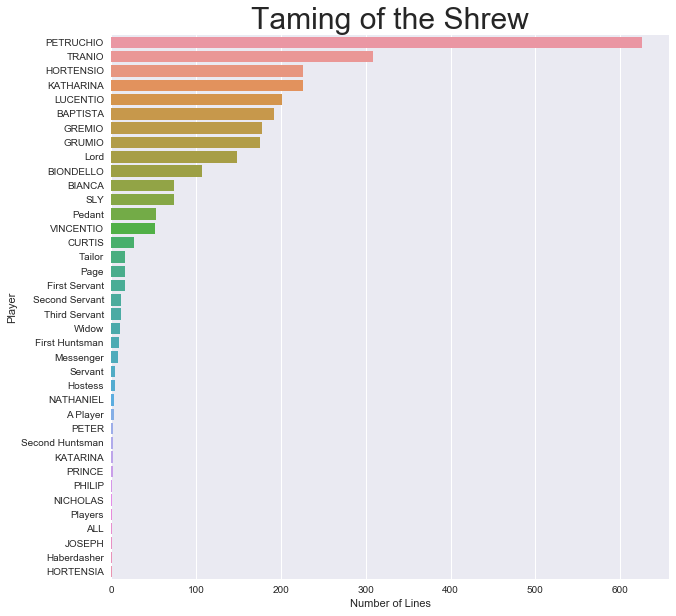

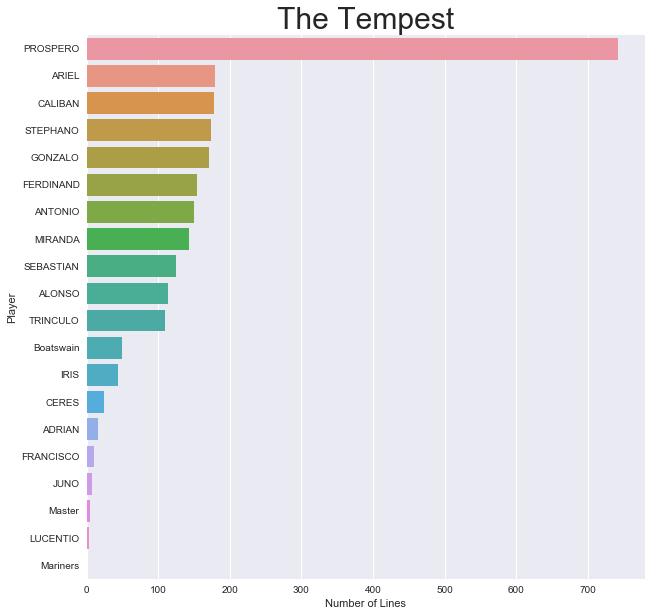

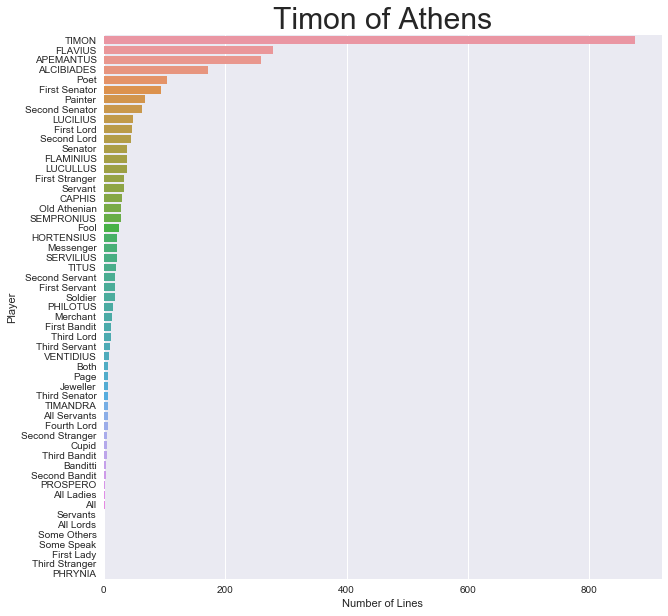

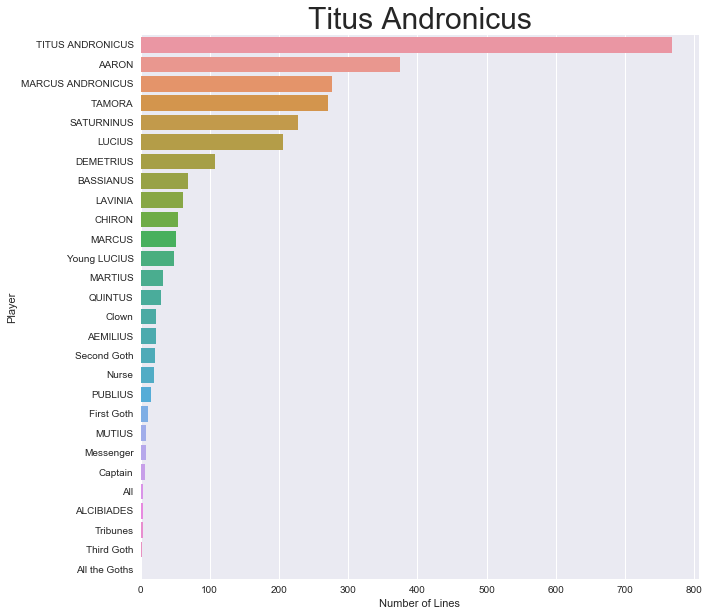

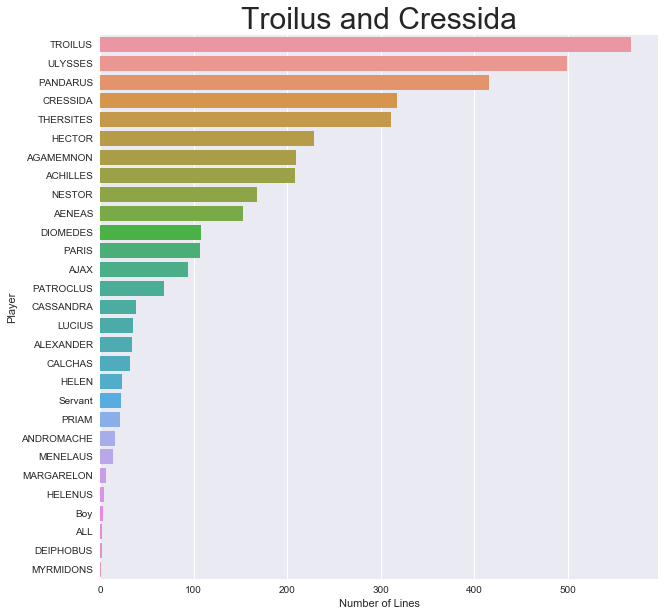

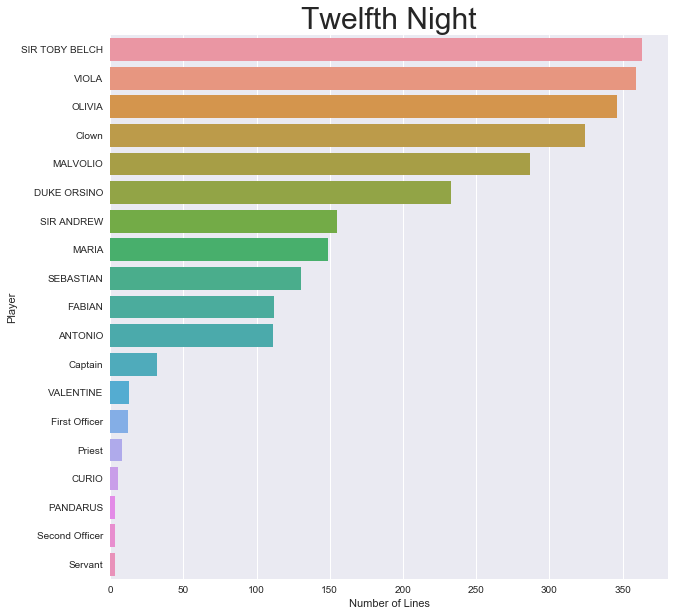

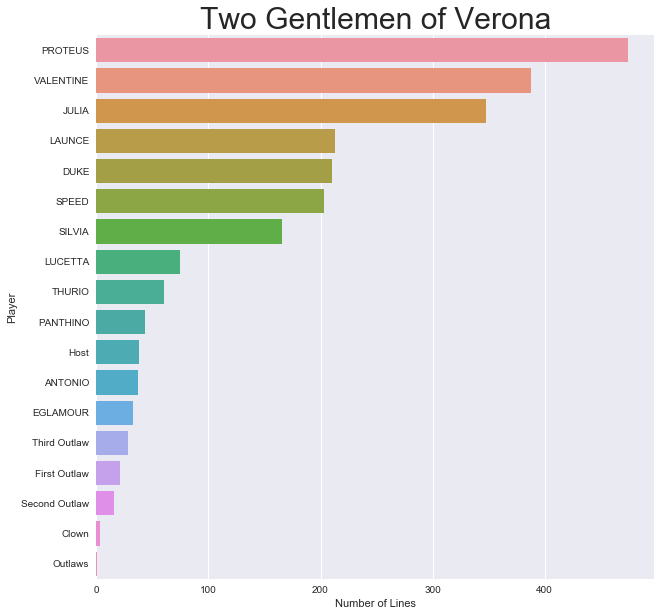

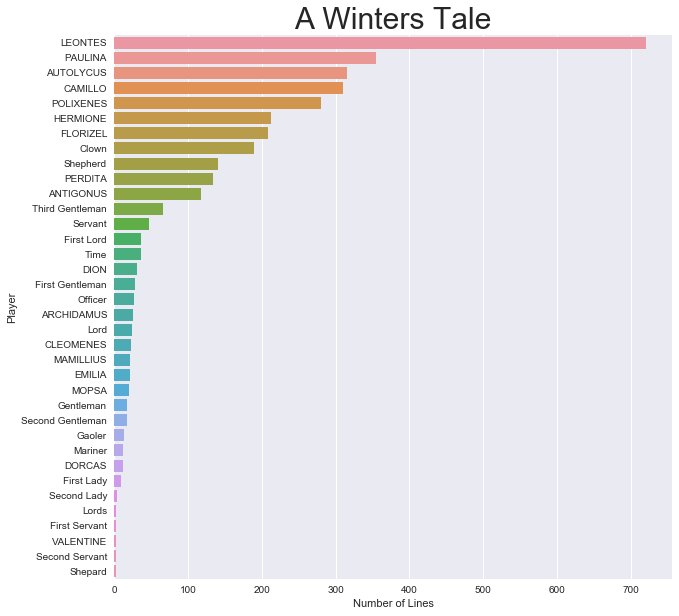

In [193]:
play_name = data['Play'].unique().tolist()
for play in play_name:
    p_line = data[data['Play']==play].groupby('Player').count().sort_values(by='Player-Line',ascending=False)['Player-Line']
    p_line = p_line.to_frame()
    p_line['Player'] = p_line.index.tolist()
    p_line.index = np.arange(0,len(p_line))
    p_line.columns=['Lines','Player']
    plt.figure(figsize=(10,10))
    ax= sns.barplot(x='Lines',y='Player',data=p_line)
    ax.set(xlabel='Number of Lines', ylabel='Player')
    plt.title(play,fontsize=30)
    plt.show()


### Visualzing the network of each play

In [194]:
g= nx.Graph()

In [260]:
g = nx.from_pandas_dataframe(data,source='Play',target='Player')

In [261]:
print (nx.info(g))

Name: 
Type: Graph
Number of nodes: 971
Number of edges: 1328
Average degree:   2.7353


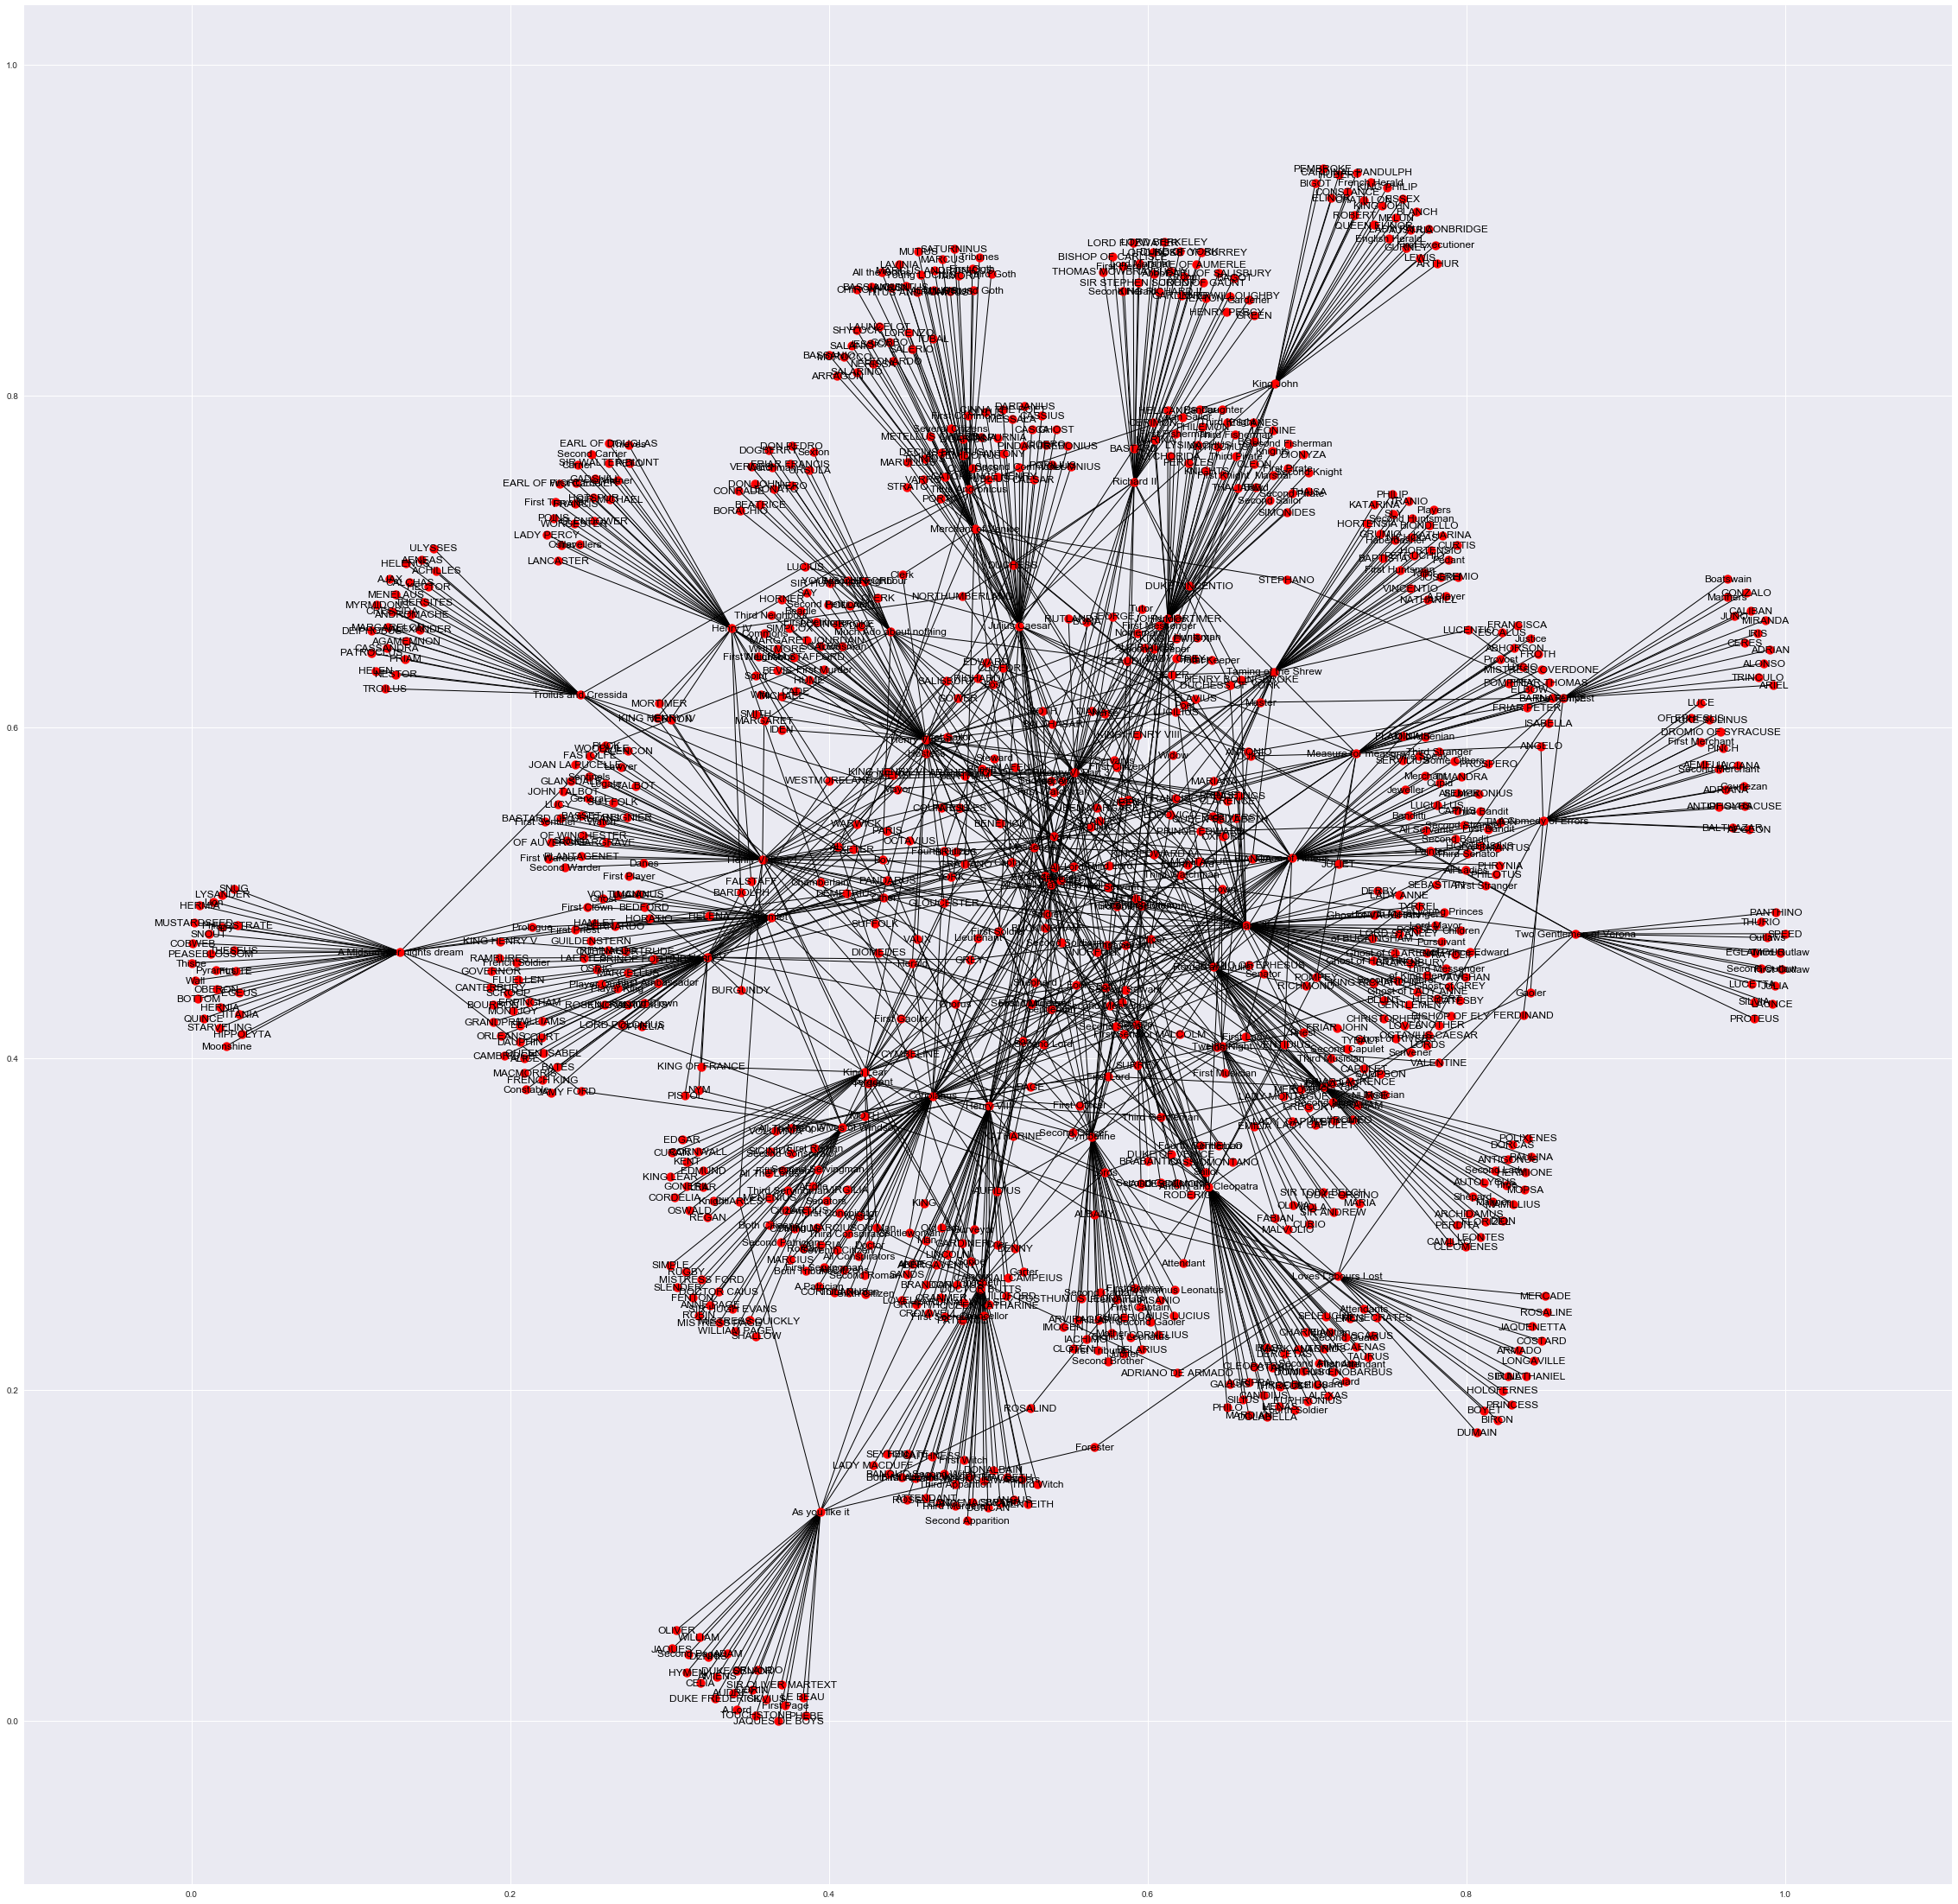

In [262]:
plt.figure(figsize=(40,40)) 
nx.draw_networkx(g,with_labels=True,node_size=100)
plt.show()

### Network Analysis

In [378]:
#Getting centrality measures for all nodes (actors and plays)

centralMeasures = pd.DataFrame(nx.degree_centrality(g),index=[0]).T
centralMeasures.columns=['Degree Centrality']
centralMeasures['Page Rank']= pd.DataFrame(nx.pagerank(g),index=[0]).T
centralMeasures['Name']= centralMeasures.index.tolist()
centralMeasures.index = np.arange(0,len(centralMeasures))
centralMeasures

Degree Centrality  Page Rank                      Name
0             0.021649   0.008255        A Comedy of Errors
1             0.001031   0.000500                    A Lord
2             0.031959   0.012699  A Midsummer nights dream
3             0.001031   0.000443               A Patrician
4             0.001031   0.000453                  A Player
5             0.037113   0.011904            A Winters Tale
6             0.001031   0.000469                     AARON
7             0.001031   0.000440               ABERGAVENNY
8             0.001031   0.000450                  ABHORSON
9             0.001031   0.000443                   ABRAHAM
10            0.001031   0.000489                  ACHILLES
11            0.001031   0.000500                      ADAM
12            0.001031   0.000479                    ADRIAN
13            0.001031   0.000488                   ADRIANA
14            0.002062   0.000787         ADRIANO DE ARMADO
15            0.001031   0.000488                    AEGEON
16            0.001031   0.000488                   AEMELIA
17            0.001031   0.000469                  AEMILIUS
18            0.001031   0.000489                    AENEAS
19            0.001031   0.000443                    AEdile
20            0.001031   0.000489                 AGAMEMNON
21            0.001031   0.000458                   AGRIPPA
22            0.001031   0.000489                      AJAX
23            0.002062   0.000758                    ALBANY
24            0.002062   0.000754                ALCIBIADES
25            0.001031   0.000431                   ALENCON
26            0.001031   0.000489                 ALEXANDER
27            0.001031   0.000458                    ALEXAS
28            0.001031   0.000439                     ALICE
29            0.008247   0.002578                       ALL
..                 ...        ...                       ...
941           0.001031   0.000443                  VIRGILIA
942           0.001031   0.000464                 VOLTIMAND
943           0.001031   0.000443                  VOLUMNIA
944           0.001031   0.000452                 VOLUMNIUS
945           0.001031   0.000457                   Vintner
946           0.001031   0.000443                    Volsce
947           0.004124   0.001247                   WARWICK
948           0.003093   0.001000              WESTMORELAND
949           0.001031   0.000427                  WHITMORE
950           0.001031   0.000500                   WILLIAM
951           0.001031   0.000449              WILLIAM PAGE
952           0.001031   0.000427          WILLIAM STAFFORD
953           0.001031   0.000439                  WILLIAMS
954           0.001031   0.000431                  WOODVILE
955           0.001031   0.000457                 WORCESTER
956           0.001031   0.000502                      Wall
957           0.001031   0.000431                     Watch
958           0.001031   0.000450                  Watchman
959           0.002062   0.000704                     Widow
960           0.001031   0.000427                      Wife
961           0.005155   0.001528                      YORK
962           0.001031   0.000427            YOUNG CLIFFORD
963           0.001031   0.000460              YOUNG SIWARD
964           0.001031   0.000469              Young LUCIUS
965           0.001031   0.000443             Young MARCIUS
966           0.043299   0.015130                   macbeth
967           0.001031   0.000436             of BUCKINGHAM
968           0.001031   0.000436          of King Henry VI
969           0.001031   0.000436          of Prince Edward
970           0.001031   0.000436          of young Princes

[971 rows x 3 columns]

### Finding the most influential characters (actors)

In [379]:
#Centrality measures only for players (or actors)
centralMeasures[centralMeasures['Name'].isin(data['Player'].unique().tolist())].sort_values(by='Degree Centrality',ascending=False)

Degree Centrality  Page Rank                Name
609           0.022680   0.006576           Messenger
845           0.020619   0.006075             Servant
58            0.015464   0.004496                 All
190           0.009278   0.002794             Captain
340           0.008247   0.002487       First Servant
313           0.008247   0.002397     First Gentleman
809           0.008247   0.002397    Second Gentleman
321           0.008247   0.002521          First Lord
29            0.008247   0.002578                 ALL
547           0.008247   0.002546                Lord
833           0.007216   0.002183      Second Servant
199           0.007216   0.002188               Clown
391           0.007216   0.002109           Gentleman
306           0.006186   0.001917       First Citizen
125           0.006186   0.001911                 Boy
369           0.006186   0.001806          GLOUCESTER
818           0.006186   0.001914         Second Lord
438           0.005155   0.001545              Herald
855           0.005155   0.001551             Soldier
342           0.005155   0.001572       First Soldier
121           0.005155   0.001547                Both
41            0.005155   0.001693             ANTONIO
961           0.005155   0.001528                YORK
338           0.004124   0.001279       First Senator
236           0.004124   0.001334                DUKE
835           0.004124   0.001296      Second Soldier
641           0.004124   0.001334             Officer
661           0.004124   0.001347               PETER
947           0.004124   0.001247             WARWICK
550           0.004124   0.001314               Lords
..                 ...        ...                 ...
395           0.001031   0.000436       Ghost of GREY
396           0.001031   0.000436   Ghost of HASTINGS
397           0.001031   0.000436  Ghost of LADY ANNE
368           0.001031   0.000457           GLENDOWER
366           0.001031   0.000452               GHOST
333           0.001031   0.000464        First Player
352           0.001031   0.000422    Fourth Gentleman
334           0.001031   0.000464        First Priest
335           0.001031   0.000443         First Roman
337           0.001031   0.000440     First Secretary
339           0.001031   0.000431      First Sentinel
341           0.001031   0.000443    First Servingman
343           0.001031   0.000439      First Stranger
344           0.001031   0.000457     First Traveller
345           0.001031   0.000439       First Tribune
346           0.001031   0.000431        First Warder
348           0.001031   0.000460         First Witch
354           0.001031   0.000436    Fourth Messenger
365           0.001031   0.000414              GEORGE
355           0.001031   0.000458      Fourth Soldier
356           0.001031   0.000487       French Herald
357           0.001031   0.000439      French Soldier
358           0.001031   0.000439           Frenchman
359           0.001031   0.000457            GADSHILL
360           0.001031   0.000458              GALLUS
361           0.001031   0.000468            GARDENER
362           0.001031   0.000440            GARDINER
363           0.001031   0.000431            GARGRAVE
364           0.001031   0.000436           GENTLEMEN
970           0.001031   0.000436    of young Princes

[935 rows x 3 columns]

In [380]:
#Centrality measures only for players (or actors)
centralMeasures[centralMeasures['Name'].isin(data['Player'].unique().tolist())].sort_values(by='Page Rank',ascending=False)

Degree Centrality  Page Rank              Name
609           0.022680   0.006576         Messenger
845           0.020619   0.006075           Servant
58            0.015464   0.004496               All
190           0.009278   0.002794           Captain
29            0.008247   0.002578               ALL
547           0.008247   0.002546              Lord
321           0.008247   0.002521        First Lord
340           0.008247   0.002487     First Servant
809           0.008247   0.002397  Second Gentleman
313           0.008247   0.002397   First Gentleman
199           0.007216   0.002188             Clown
833           0.007216   0.002183    Second Servant
391           0.007216   0.002109         Gentleman
306           0.006186   0.001917     First Citizen
818           0.006186   0.001914       Second Lord
125           0.006186   0.001911               Boy
369           0.006186   0.001806        GLOUCESTER
41            0.005155   0.001693           ANTONIO
342           0.005155   0.001572     First Soldier
855           0.005155   0.001551           Soldier
121           0.005155   0.001547              Both
438           0.005155   0.001545            Herald
961           0.005155   0.001528              YORK
661           0.004124   0.001347             PETER
236           0.004124   0.001334              DUKE
641           0.004124   0.001334           Officer
746           0.004124   0.001320         SALISBURY
550           0.004124   0.001314             Lords
835           0.004124   0.001296    Second Soldier
820           0.004124   0.001287  Second Messenger
..                 ...        ...               ...
422           0.001031   0.000427            HORNER
810           0.001031   0.000422  Second Gentlemen
590           0.001031   0.000422           MONTANO
110           0.001031   0.000422         BRABANTIO
639           0.001031   0.000422           OTHELLO
731           0.001031   0.000422          RODERIGO
443           0.001031   0.000422              IAGO
146           0.001031   0.000422            CASSIO
792           0.001031   0.000422            Sailor
216           0.001031   0.000422         DESDEMONA
240           0.001031   0.000422    DUKE OF VENICE
352           0.001031   0.000422  Fourth Gentleman
297           0.001031   0.000414            Father
103           0.001031   0.000414              BONA
622           0.001031   0.000414          Nobleman
494           0.001031   0.000414         LADY GREY
479           0.001031   0.000414     KING LEWIS XI
455           0.001031   0.000414     JOHN MORTIMER
441           0.001031   0.000414          Huntsman
815           0.001031   0.000414     Second Keeper
738           0.001031   0.000414           RUTLAND
365           0.001031   0.000414            GEORGE
323           0.001031   0.000414   First Messenger
318           0.001031   0.000414      First Keeper
924           0.001031   0.000414             Tutor
653           0.001031   0.000406          PAROLLES
92            0.001031   0.000406           BERTRAM
181           0.001031   0.000406          COUNTESS
500           0.001031   0.000406             LAFEU
862           0.001031   0.000406           Steward

[935 rows x 3 columns]

** Conclusion from the analysis above: **
- The character with the most connections is the "Messenger"
- The "Messenger" also appears to be a very influential character in all of Shakespeare's plays


In [383]:
#number of nodes that the "Messenger" is connected to across all plays
len(g.neighbors('Messenger'))

22

In [381]:
#getting the number of lines a messanger spoke across all the plays
data[data['Player']=='Messenger']['Player-Line'].count()

508

### Finding the most influential plays

In [384]:
centralMeasures[centralMeasures['Name'].isin(data['Play'].unique().tolist())].sort_values(by='Degree Centrality',ascending=False)

Degree Centrality  Page Rank                      Name
740           0.073196   0.023528               Richard III
435           0.067010   0.020893           Henry VI Part 2
202           0.063918   0.021069                Coriolanus
918           0.056701   0.018453           Timon of Athens
68            0.056701   0.019671      Antony and Cleopatra
434           0.054639   0.017234           Henry VI Part 1
463           0.052577   0.017871             Julius Caesar
699           0.049485   0.017188                  Pericles
433           0.048454   0.015721                   Henry V
437           0.048454   0.015826                Henry VIII
436           0.047423   0.014047           Henry VI Part 3
206           0.043299   0.014070                 Cymbeline
966           0.043299   0.015130                   macbeth
889           0.039175   0.013343       Taming of the Shrew
742           0.038144   0.012592          Romeo and Juliet
739           0.038144   0.013661                Richard II
432           0.037113   0.012812                  Henry IV
5             0.037113   0.011904            A Winters Tale
431           0.036082   0.012750                    Hamlet
2             0.031959   0.012699  A Midsummer nights dream
486           0.029897   0.011367                 King John
923           0.029897   0.011414      Troilus and Cressida
646           0.029897   0.009122                   Othello
919           0.028866   0.010376          Titus Andronicus
70            0.028866   0.011397            As you like it
487           0.027835   0.008830                 King Lear
67            0.026804   0.007711  Alls well that ends well
605           0.026804   0.009044       Measure for measure
608           0.025773   0.008675    Merry Wives of Windsor
607           0.024742   0.008589        Merchant of Venice
612           0.024742   0.008343    Much Ado about nothing
0             0.021649   0.008255        A Comedy of Errors
551           0.021649   0.008066        Loves Labours Lost
890           0.020619   0.007645               The Tempest
925           0.019588   0.006413             Twelfth Night
926           0.018557   0.006960   Two Gentlemen of Verona

In [385]:
centralMeasures[centralMeasures['Name'].isin(data['Play'].unique().tolist())].sort_values(by='Page Rank',ascending=False)

Degree Centrality  Page Rank                      Name
740           0.073196   0.023528               Richard III
202           0.063918   0.021069                Coriolanus
435           0.067010   0.020893           Henry VI Part 2
68            0.056701   0.019671      Antony and Cleopatra
918           0.056701   0.018453           Timon of Athens
463           0.052577   0.017871             Julius Caesar
434           0.054639   0.017234           Henry VI Part 1
699           0.049485   0.017188                  Pericles
437           0.048454   0.015826                Henry VIII
433           0.048454   0.015721                   Henry V
966           0.043299   0.015130                   macbeth
206           0.043299   0.014070                 Cymbeline
436           0.047423   0.014047           Henry VI Part 3
739           0.038144   0.013661                Richard II
889           0.039175   0.013343       Taming of the Shrew
432           0.037113   0.012812                  Henry IV
431           0.036082   0.012750                    Hamlet
2             0.031959   0.012699  A Midsummer nights dream
742           0.038144   0.012592          Romeo and Juliet
5             0.037113   0.011904            A Winters Tale
923           0.029897   0.011414      Troilus and Cressida
70            0.028866   0.011397            As you like it
486           0.029897   0.011367                 King John
919           0.028866   0.010376          Titus Andronicus
646           0.029897   0.009122                   Othello
605           0.026804   0.009044       Measure for measure
487           0.027835   0.008830                 King Lear
608           0.025773   0.008675    Merry Wives of Windsor
607           0.024742   0.008589        Merchant of Venice
612           0.024742   0.008343    Much Ado about nothing
0             0.021649   0.008255        A Comedy of Errors
551           0.021649   0.008066        Loves Labours Lost
67            0.026804   0.007711  Alls well that ends well
890           0.020619   0.007645               The Tempest
926           0.018557   0.006960   Two Gentlemen of Verona
925           0.019588   0.006413             Twelfth Night

** Conclusion from the analysis above: **
- The play with the most connections is the "Richard III"
- "Richard III" also appears to be the most influential play from all of Shakespeare's plays


In [386]:
#number of nodes that "Richard III" is connected to
len(g.neighbors('Richard III'))

71